In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Train1 = pd.read_csv('X_train_80_20_KNN_RFE.csv')

In [3]:
Train2 = pd.read_csv('y_train_80_20_KNN_RFE.csv')

In [4]:
Test1 = pd.read_csv('X_test_80_20_KNN_RFE.csv')

In [5]:
Test2 = pd.read_csv('y_test_80_20_KNN_RFE.csv')

In [6]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

def confusion_matrix_and_metrics(model, y_test, preds, X_test):
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",xticklabels=['Act. pass', 'Act. fail'], yticklabels=['Pred. pass', 'Pred. fail']);
    print(classification_report(y_test, preds))


    print('Average Accuracy:', accuracy_score(y_test, preds))
    print('Average Balanced Accuracy:', balanced_accuracy_score(y_test, preds))

<ipython-input-7-900f8802af23>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Train1, Train2)


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       295
         1.0       0.18      0.32      0.23        19

    accuracy                           0.87       314
   macro avg       0.57      0.61      0.58       314
weighted avg       0.91      0.87      0.89       314

Average Accuracy: 0.8694267515923567
Average Balanced Accuracy: 0.6104371097234612


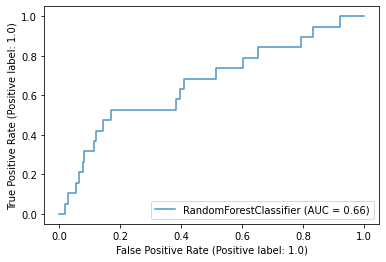

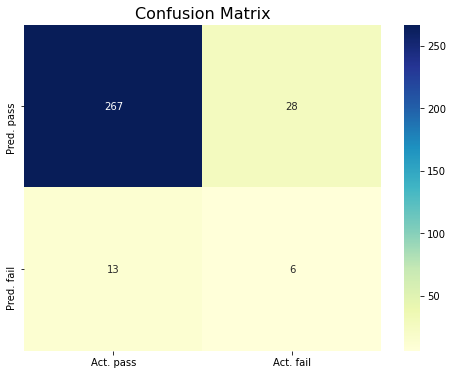

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

model = RandomForestClassifier(n_jobs = -1, max_depth = 5, random_state=42)
model.fit(Train1, Train2)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, Test1,Test2, ax=ax, alpha=0.8)
preds = model.predict(Test1)


confusion_matrix_and_metrics(model,Test2, preds, Test1)
plt.show()
